Parts of this code was taken from the Image Annotation Dash notebook (Copyright 2021 Twitter, Inc.).

In [2]:
import base64
import logging
import shlex
import subprocess
import sys
import tempfile
from collections import namedtuple
from io import BytesIO
from pathlib import Path

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from PIL import Image
import matplotlib.patches as patches

import datetime
import os
from os.path import join
import re

from Scweet.scweet import scrap
from crop_api import ImageSaliencyModel

In [6]:
model = ImageSaliencyModel(
    crop_binary_path=bin_path,
    crop_model_path=model_path,
)

### Get Dataset of Specific Groups from Public Images on Twitter

In [7]:
#Gay art

data = scrap(start_date="2021-07-01", max_date="2021-08-03", from_account="bubentcov",
             display_type="image", save_images=True, save_dir="../imgs_2")

Scraping on headless mode.
looking for tweets between 2021-07-01 and 2021-07-06 ...
 path : https://twitter.com/search?q=(from%3Abubentcov)%20until%3A2021-07-06%20since%3A2021-07-01%20&src=typed_query&f=image
Tweet made at: 2021-07-03T18:47:56.000Z is found.
scroll  1
scroll  2
scroll  3
looking for tweets between 2021-07-06 and 2021-07-11 ...
 path : https://twitter.com/search?q=(from%3Abubentcov)%20until%3A2021-07-11%20since%3A2021-07-06%20&src=typed_query&f=image
Tweet made at: 2021-07-07T07:58:47.000Z is found.
Tweet made at: 2021-07-10T19:03:31.000Z is found.
Tweet made at: 2021-07-06T12:26:59.000Z is found.
scroll  1
scroll  2
scroll  3
looking for tweets between 2021-07-11 and 2021-07-16 ...
 path : https://twitter.com/search?q=(from%3Abubentcov)%20until%3A2021-07-16%20since%3A2021-07-11%20&src=typed_query&f=image
Tweet made at: 2021-07-15T18:29:28.000Z is found.
scroll  1
scroll  2
scroll  3
looking for tweets between 2021-07-16 and 2021-07-21 ...
 path : https://twitter.com/se

In [13]:
#Indigenous_african

data = scrap(start_date="2021-05-01", max_date="2021-08-03", from_account="tribalnude", interval=7,
             display_type="image", save_images=True, save_dir="../imgs_3")

Scraping on headless mode.
looking for tweets between 2021-05-01 and 2021-05-08 ...
 path : https://twitter.com/search?q=(from%3Atribalnude)%20until%3A2021-05-08%20since%3A2021-05-01%20&src=typed_query&f=image
scroll  1
scroll  2
looking for tweets between 2021-05-08 and 2021-05-15 ...
 path : https://twitter.com/search?q=(from%3Atribalnude)%20until%3A2021-05-15%20since%3A2021-05-08%20&src=typed_query&f=image
Tweet made at: 2021-05-13T21:50:37.000Z is found.
Tweet made at: 2021-05-13T22:12:57.000Z is found.
Tweet made at: 2021-05-13T22:12:19.000Z is found.
scroll  1
scroll  2
scroll  3
looking for tweets between 2021-05-15 and 2021-05-22 ...
 path : https://twitter.com/search?q=(from%3Atribalnude)%20until%3A2021-05-22%20since%3A2021-05-15%20&src=typed_query&f=image
scroll  1
scroll  2
looking for tweets between 2021-05-22 and 2021-05-29 ...
 path : https://twitter.com/search?q=(from%3Atribalnude)%20until%3A2021-05-29%20since%3A2021-05-22%20&src=typed_query&f=image
scroll  1
scroll  2
l

In [10]:
# black nudist
data = scrap(start_date="2021-07-01", max_date="2021-08-03", from_account="blknudist75", interval=5,
             display_type="image", save_images=True, save_dir="../imgs_4")

Scraping on headless mode.
looking for tweets between 2021-07-01 and 2021-07-06 ...
 path : https://twitter.com/search?q=(from%3Ablknudist75)%20until%3A2021-07-06%20since%3A2021-07-01%20&src=typed_query&f=image
Tweet made at: 2021-07-03T04:06:00.000Z is found.
Tweet made at: 2021-07-04T16:55:26.000Z is found.
Tweet made at: 2021-07-05T05:00:20.000Z is found.
Tweet made at: 2021-07-03T02:04:40.000Z is found.
scroll  1
scroll  2
scroll  3
looking for tweets between 2021-07-06 and 2021-07-11 ...
 path : https://twitter.com/search?q=(from%3Ablknudist75)%20until%3A2021-07-11%20since%3A2021-07-06%20&src=typed_query&f=image
Tweet made at: 2021-07-06T11:25:56.000Z is found.
Tweet made at: 2021-07-06T18:49:26.000Z is found.
Tweet made at: 2021-07-10T01:00:31.000Z is found.
Tweet made at: 2021-07-06T11:20:20.000Z is found.
scroll  1
scroll  2
scroll  3
looking for tweets between 2021-07-11 and 2021-07-16 ...
 path : https://twitter.com/search?q=(from%3Ablknudist75)%20until%3A2021-07-16%20since%3

In [12]:
#(mostly white) nudist
data = scrap(start_date="2021-03-01", max_date="2021-08-03", from_account="artskyclad", interval=5,
             display_type="image", save_images=True, save_dir="../imgs_5")

Scraping on headless mode.
looking for tweets between 2021-03-01 and 2021-03-06 ...
 path : https://twitter.com/search?q=(from%3Aartskyclad)%20until%3A2021-03-06%20since%3A2021-03-01%20&src=typed_query&f=image
Tweet made at: 2021-03-01T17:58:00.000Z is found.
Tweet made at: 2021-03-01T17:57:37.000Z is found.
Tweet made at: 2021-03-03T04:00:34.000Z is found.
scroll  1
scroll  2
scroll  3
looking for tweets between 2021-03-06 and 2021-03-11 ...
 path : https://twitter.com/search?q=(from%3Aartskyclad)%20until%3A2021-03-11%20since%3A2021-03-06%20&src=typed_query&f=image
scroll  1
scroll  2
looking for tweets between 2021-03-11 and 2021-03-16 ...
 path : https://twitter.com/search?q=(from%3Aartskyclad)%20until%3A2021-03-16%20since%3A2021-03-11%20&src=typed_query&f=image
scroll  1
scroll  2
looking for tweets between 2021-03-16 and 2021-03-21 ...
 path : https://twitter.com/search?q=(from%3Aartskyclad)%20until%3A2021-03-21%20since%3A2021-03-16%20&src=typed_query&f=image
scroll  1
scroll  2
l

Tweet made at: 2021-07-23T21:58:11.000Z is found.
scroll  1
scroll  2
scroll  3
looking for tweets between 2021-07-24 and 2021-07-29 ...
 path : https://twitter.com/search?q=(from%3Aartskyclad)%20until%3A2021-07-29%20since%3A2021-07-24%20&src=typed_query&f=image
scroll  1
scroll  2
looking for tweets between 2021-07-29 and 2021-08-03 ...
 path : https://twitter.com/search?q=(from%3Aartskyclad)%20until%3A2021-08-03%20since%3A2021-07-29%20&src=typed_query&f=image
scroll  1
scroll  2
Saving images ...


### Crop every image using the Cropper Model

None 3000 3000


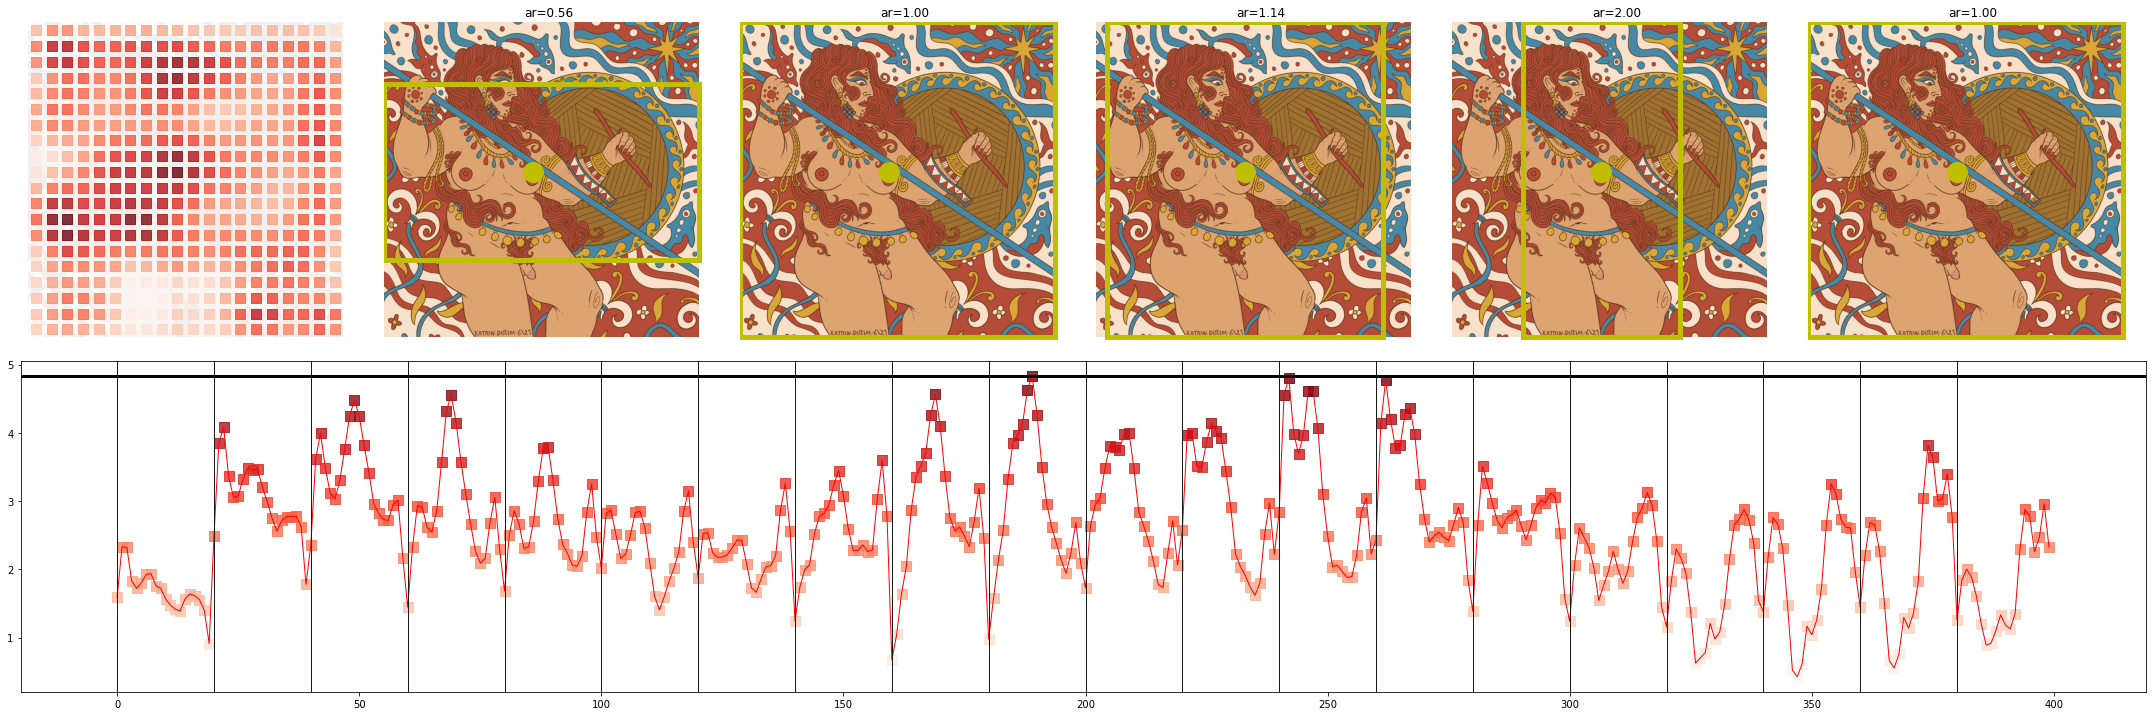

In [57]:
poster_dir = HOME_DIR / Path("./data")
for image in (poster_dir.iterdir()):
    if image.name.endswith('.jpg') or image.name.endswith('.png'):
        img_path = image
        model.plot_img_crops(img_path, topK=1)

In [34]:

def get_salient_point(img_path, model):
    # img_path is a Posix path
    img = mpimg.imread(img_path)
    img_h, img_w = img.shape[:2]
    aspectRatios = [0.56, 1.0, 1.14, 2.0, img_h / img_w]

    output = model.get_output(img_path, aspectRatios=aspectRatios)
    salient_x, salient_y = output["salient_point"][0]
    return (salient_x, salient_y)

def get_rectangle(center_point, height, width):
    return patches.Rectangle((center_point[0] - width/2, center_point[1] - height/2),
                             width, height, edgecolor='lime', facecolor='none')



In [57]:

def annotate_image(img_path, out_dir, cropper=model):
    img_posix = Path(img_path)
    center = get_salient_point(img_posix, cropper)
    rect = get_rectangle(center, 200, 200)

    im = Image.open(img_path)

    # Create figure and axes
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)

    ax.plot(center[0], center[1], marker='o', color="yellow")
    # Display the image
    ax.imshow(im)

    # Add the patch to the Axes
    ax.add_patch(rect)
    ax.axis('off')
    
    basename = os.path.basename(img_path)
    fig.savefig(join(out_dir, basename), dpi=100)
    plt.close()

In [58]:
root = '../'

img_folders = [folder for folder in os.listdir(root) if folder.startswith('imgs')]



for folder in img_folders:
    new_folder = folder+'_annotated'
    if not os.path.isdir(join(root, new_folder)):
        os.mkdir(join(root, new_folder))
        
    for file in sorted(os.listdir(join(root, folder))):
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            annotate_image(join(root, folder, file), join(root, new_folder))

In [59]:
for file in sorted(os.listdir(join(root, 'data'))):
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        annotate_image(join(root, 'data', file), join(root, 'data_annotated'))